# Instructions


1. Given previous weather forcast data implement a model to predict whether or not it will rain tomorrow. 
2. <b>Evaluate your results. cross-validate your results using CV algorithm of your choice with 10 folds </b> 

## Beat the Baseline of 50% to pass the lab. Anything above 65% gets you a full score.

# About The Dataset


This dataset contains observations of weather metrics for each day from 2008 to 2017. The dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |



In [97]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [98]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, f1_score
import sklearn.metrics as metrics
from sklearn.utils.class_weight import compute_sample_weight

### Importing the Dataset


In [ ]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')

df.head()

### Data Preprocessing


#### Transforming Categorical Variables


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [99]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [100]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

Check for missing and duplicate values

In [101]:
df_sydney_processed.drop_duplicates(inplace=True)
df_sydney_processed.isna().sum()

Date              0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 68, dtype: int64

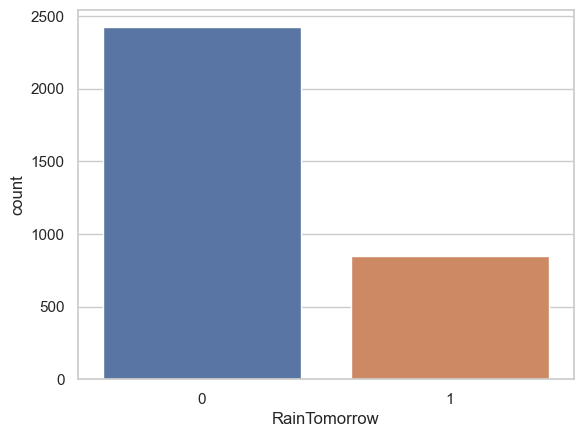

In [102]:
sns.set(style="whitegrid")
sns.countplot(df_sydney_processed.RainTomorrow)
plt.show()

<AxesSubplot:>

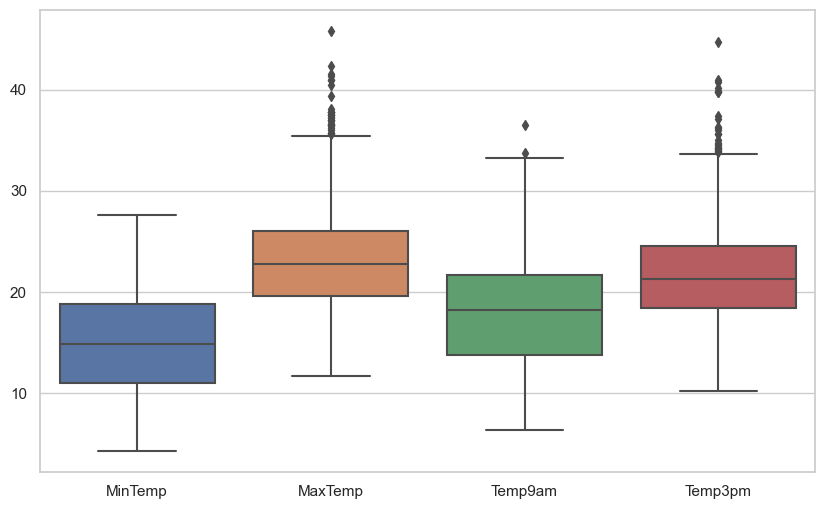

In [103]:
#check for outliers if need be using this code here
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sydney_processed[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [104]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [105]:
df_sydney_processed = df_sydney_processed.astype(float)

In [106]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

#### Q1) Using `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [116]:
x_train, x_test, y_train, y_test =  train_test_split(features, Y, test_size=0.2, random_state=4)

#### Create and train your model using the training data (`x_train`, `y_train`).


In [121]:
#Your code here
# Desicion  tree
#w_train = compute_sample_weight('balanced', y_train)
from sklearn import tree

# Create the classifier
model = tree.DecisionTreeClassifier(max_depth=5)




In [122]:
# Train the classifier using the training data
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5)

#### Use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [123]:
#Your code here
predictions= model.predict(x_test)

print(predictions)
#print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

In [ ]:
#### checkkkk
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import cross_val_score

# # Generate predictions for the test set
# y_pred = model.predict(x_test)

# # Calculate evaluation metrics
# accuracy = accuracy_


#### Using the `predictions` and the `y_test` dataframe Evaluate your model and cross validate your results

In [124]:
#Enter Your Code, Execute and take the Screenshot

##
# from sklearn.metrics import accuracy_score ,f1_score
# score = accuracy_score(predictions,y_train)
# print(score)



# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import cross_val_score

# # Generate predictions for the test set
# y_pred = model.predict(x_test)

# # Calculate evaluation metrics
# accuracy = accuracy_

from sklearn.metrics import accuracy_score ,f1_score
score = accuracy_score(predictions,y_test)
print(score)

0.8274809160305343


In [125]:
#precision score
from sklearn.metrics import precision_score
precision_score(y_test,predictions)

0.75

In [126]:
# recall score
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.5737704918032787

In [127]:
# for f1 score
from sklearn.metrics import f1_score

f1 = f1_score(predictions,y_test, average=None)
print(f1)

[0.88551165 0.6501548 ]


In [129]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x,y, cv=10)
print(f'Cv Scores: {scores}')


Cv Scores: [0.84 0.84 0.78 0.86 0.79 0.76 0.77 0.82 0.88 0.87]


In [ ]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(model, y_test, cv=7)
# print(scores)

In [ ]:
# #check 
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(solver = 'saga', max_iter = 100, class_weight ='balanced',verbose = 1)





# print(scores)


In [ ]:
# from sklearn.metrics import accuracy_score ,f1_score
# score = accuracy_score(predictions,y_test)
# print(score)

#### Discuss your findings 

In [ ]:
# In the above problem i used decision tree with max_depth=5 because its not depend on standardization and normalization and also its not required weighting or down sampling.
# so according to my point of view decision tree also does not take much time as compare to randomForest,xgboost and logistic regression.
# benefit of decision tree is that we can adjust its timing with max_depth.
